In [215]:
%matplotlib inline

In [216]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [217]:
df = pd.read_csv('QVI_data.csv')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


## Data Cleaning

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [219]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [220]:
# make sure date is from July 2018 to June 2019
df[(df['DATE'] < '2018-07-01') & (df['DATE'] > '2019-06-30')]

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER


In [221]:
# create year-month column
df['YEARMONTH'] = df['DATE'].dt.strftime('%Y%m').astype('int')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


In [222]:
# check null values
df.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
YEARMONTH           0
dtype: int64

In [223]:
# Monthly total sales for each store
mthsales = df.groupby(['STORE_NBR','YEARMONTH']).TOT_SALES.sum()
sales_df = pd.DataFrame(data=mthsales)
sales_df.rename(columns={'TOT_SALES':'totalSales'}, inplace=True)
sales_df

totalSales
STORE_NBR YEARMONTH            
1         201807          206.9
          201808          176.1
          201809          278.8
          201810          188.1
          201811          192.6
...                         ...
272       201902          395.5
          201903          442.3
          201904          445.1
          201905          314.6
          201906          312.1

[3169 rows x 1 columns]

In [224]:
# monthly total number of customers for each store
mthcustomers = df.groupby(['STORE_NBR','YEARMONTH']).LYLTY_CARD_NBR.nunique()
customers_df = pd.DataFrame(data=mthcustomers)
customers_df.rename(columns={'LYLTY_CARD_NBR':'nCustomers'}, inplace=True)
customers_df

nCustomers
STORE_NBR YEARMONTH            
1         201807             49
          201808             42
          201809             59
          201810             44
          201811             46
...                         ...
272       201902             45
          201903             50
          201904             54
          201905             34
          201906             34

[3169 rows x 1 columns]

In [225]:
# monthly transaction per customer
mthtranspercust = df.groupby(['STORE_NBR','YEARMONTH']).TXN_ID.nunique() / df.groupby(['STORE_NBR','YEARMONTH']).LYLTY_CARD_NBR.nunique()
transpercust_df = pd.DataFrame(data=mthtranspercust)
transpercust_df.rename(columns={0:'transPerUnit'}, inplace=True)
transpercust_df

transPerUnit
STORE_NBR YEARMONTH              
1         201807         1.061224
          201808         1.023810
          201809         1.050847
          201810         1.022727
          201811         1.021739
...                           ...
272       201902         1.066667
          201903         1.060000
          201904         1.018519
          201905         1.176471
          201906         1.088235

[3169 rows x 1 columns]

In [226]:
# monthly chips per transaction
mthchipspertrans = df.groupby(['STORE_NBR','YEARMONTH']).PROD_QTY.sum() / df.groupby(['STORE_NBR','YEARMONTH']).TXN_ID.nunique()
chipspertrans_df = pd.DataFrame(data=mthchipspertrans)
chipspertrans_df.rename(columns={0:'chipsPerTrans'}, inplace=True)
chipspertrans_df

chipsPerTrans
STORE_NBR YEARMONTH               
1         201807          1.192308
          201808          1.255814
          201809          1.209677
          201810          1.288889
          201811          1.212766
...                            ...
272       201902          1.895833
          201903          1.905660
          201904          1.909091
          201905          1.775000
          201906          1.891892

[3169 rows x 1 columns]

In [227]:
# monthly average price per unit
mthavepriceperunit = df.groupby(['STORE_NBR','YEARMONTH']).TOT_SALES.sum() / df.groupby(['STORE_NBR','YEARMONTH']).PROD_QTY.sum()
avepriceperunit_df = pd.DataFrame(data=mthavepriceperunit)
avepriceperunit_df.rename(columns={0:'avePricePerUnit'}, inplace=True)
avepriceperunit_df

avePricePerUnit
STORE_NBR YEARMONTH                 
1         201807            3.337097
          201808            3.261111
          201809            3.717333
          201810            3.243103
          201811            3.378947
...                              ...
272       201902            4.346154
          201903            4.379208
          201904            4.239048
          201905            4.430986
          201906            4.458571

[3169 rows x 1 columns]

In [228]:
df_list = [sales_df, customers_df, transpercust_df, chipspertrans_df, avepriceperunit_df]
monthly_df = pd.concat(df_list, axis=1)
monthly_df.reset_index(inplace=True)
monthly_df.head(10)

,STORE_NBR,YEARMONTH,totalSales,nCustomers,transPerUnit,chipsPerTrans,avePricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
5,1,201812,189.6,42,1.119048,1.212766,3.326316
6,1,201901,154.8,35,1.028571,1.166667,3.685714
7,1,201902,225.4,52,1.057692,1.181818,3.467692
8,1,201903,192.9,45,1.088889,1.183673,3.325862
9,1,201904,192.9,42,1.023810,1.325581,3.384211


In [229]:
# pre trial period from 201807 to 201901
# trial period from 201902 to 201904
# post period from 201905 to 201906
def trialperiod(yearmonth):
    if yearmonth < 201902:
        return 'pre-trial'
    elif yearmonth > 201904:
        return 'post'
    else:
        return 'trial'

monthly_df['trialPeriod'] = monthly_df['YEARMONTH'].apply(lambda yearmonth: trialperiod(yearmonth))
monthly_df.head()

,STORE_NBR,YEARMONTH,totalSales,nCustomers,transPerUnit,chipsPerTrans,avePricePerUnit,trialPeriod
0,1,201807,206.9,49,1.061224,1.192308,3.337097,pre-trial
1,1,201808,176.1,42,1.023810,1.255814,3.261111,pre-trial
2,1,201809,278.8,59,1.050847,1.209677,3.717333,pre-trial
3,1,201810,188.1,44,1.022727,1.288889,3.243103,pre-trial
4,1,201811,192.6,46,1.021739,1.212766,3.378947,pre-trial


In [230]:
# add transaction month column (for graphing)
monthly_df['transactionMonth'] = pd.to_datetime(monthly_df['YEARMONTH'].astype(str), format='%Y%m')
monthly_df.head()

,STORE_NBR,YEARMONTH,totalSales,nCustomers,transPerUnit,chipsPerTrans,avePricePerUnit,trialPeriod,transactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,pre-trial,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,pre-trial,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,pre-trial,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,pre-trial,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,pre-trial,2018-11-01


In [231]:
pretrial = monthly_df.loc[monthly_df['trialPeriod'] == 'pre-trial']
pretrial.set_index(['STORE_NBR', 'YEARMONTH'], inplace=True)
pretrial.head(10)

totalSales  nCustomers  transPerUnit  chipsPerTrans  \
STORE_NBR YEARMONTH                                                        
1         201807          206.9          49      1.061224       1.192308   
          201808          176.1          42      1.023810       1.255814   
          201809          278.8          59      1.050847       1.209677   
          201810          188.1          44      1.022727       1.288889   
          201811          192.6          46      1.021739       1.212766   
          201812          189.6          42      1.119048       1.212766   
          201901          154.8          35      1.028571       1.166667   
2         201807          150.8          39      1.051282       1.121951   
          201808          193.8          39      1.102564       1.279070   
          201809          154.4          36      1.027778       1.108108   

                     avePricePerUnit trialPeriod transactionMonth  
STORE_NBR YEARMONTH                                                
1         201807            3.337097   pre-trial       2018-07-01  
          201808            3.261111   pre-trial       2018-08-01  
          201809            3.717333   pre-trial       2018-09-01  
          201810            3.243103   pre-trial       2018-10-01  
          201811            3.378947   pre-trial       2018-11-01  
          201812            3.326316   pre-trial       2018-12-01  
          201901            3.685714   pre-trial       2019-01-01  
2         201807            3.278261   pre-trial       2018-07-01  
          201808            3.523636   pre-trial       2018-08-01  
          201809            3.765854   pre-trial       2018-09-01

In [250]:
trial = monthly_df.loc[monthly_df['trialPeriod'] == 'trial']
trial.head()

,STORE_NBR,YEARMONTH,totalSales,nCustomers,transPerUnit,chipsPerTrans,avePricePerUnit,trialPeriod,transactionMonth
7,1,201902,225.4,52,1.057692,1.181818,3.467692,trial,2019-02-01
8,1,201903,192.9,45,1.088889,1.183673,3.325862,trial,2019-03-01
9,1,201904,192.9,42,1.023810,1.325581,3.384211,trial,2019-04-01
19,2,201902,139.4,29,1.103448,1.156250,3.767568,trial,2019-02-01
20,2,201903,192.1,43,1.069767,1.108696,3.766667,trial,2019-03-01


## Correlation Function

In [232]:
def Correlation(store):
    a=[]
    metrix = pretrial[['totalSales','nCustomers']]
    for i in metrix.index:
        a.append(metrix.loc[store].corrwith(metrix.loc[i[0]]))
    output = pd.DataFrame(a)
    output.index = metrix.index
    output = output.drop_duplicates()
    output.reset_index(inplace=True)
    output.drop(['YEARMONTH'], axis=1, inplace=True)
    output.set_index('STORE_NBR', inplace=True)    

    output = output.abs()
    output['Magnitude'] = output.mean(axis=1)
    return output

## Store 77

In [233]:
corr77 = Correlation(77).sort_values(['Magnitude'], ascending=False).dropna()
corr77.head()

,totalSales,nCustomers,Magnitude
STORE_NBR,,,
77,1.000000,1.000000,1.000000
233,0.903774,0.990358,0.947066
119,0.867664,0.983267,0.925466
71,0.914106,0.754817,0.834461
3,0.806644,0.834207,0.820426


Choose store 233 as control store since it has the most correlation with store 77.

<AxesSubplot:ylabel='STORE_NBR'>

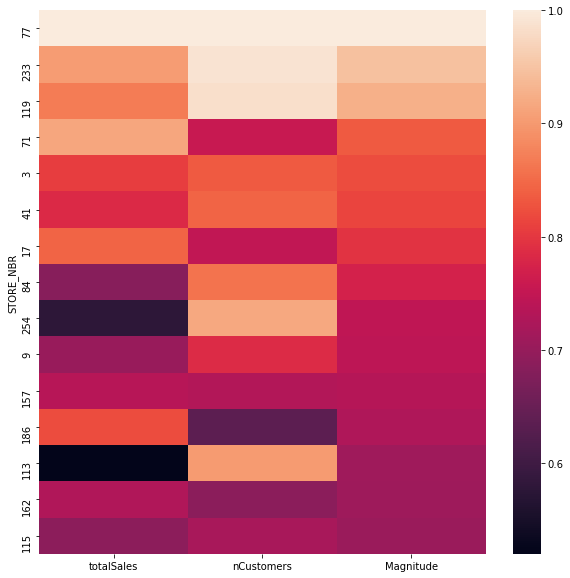

In [234]:
plt.figure(figsize=(10,10))
sb.heatmap(corr77[corr77['Magnitude'] > 0.7])

In [235]:
pretrial = monthly_df.loc[monthly_df['trialPeriod'] == 'pre-trial']

In [236]:
pretrial

,STORE_NBR,YEARMONTH,totalSales,nCustomers,transPerUnit,chipsPerTrans,avePricePerUnit,trialPeriod,transactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,pre-trial,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,pre-trial,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,pre-trial,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,pre-trial,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,pre-trial,2018-11-01
...,...,...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,1.972222,4.291549,pre-trial,2018-09-01
3160,272,201810,430.6,44,1.136364,1.980000,4.349495,pre-trial,2018-10-01
3161,272,201811,376.2,41,1.097561,1.933333,4.324138,pre-trial,2018-11-01
3162,272,201812,403.9,47,1.000000,1.893617,4.538202,pre-trial,2018-12-01


In [239]:
# create function to show trial and control's total monthly sales.
def compareSales(trialStore, controlStore):
    compare = pretrial

    trialStore_df = compare.loc[compare['STORE_NBR'] == trialStore]
    trialStore_df.drop(trialStore_df.columns[[0, 1, 3, 4, 5, 6, 7]], axis=1, inplace=True)
    trialStore_df.rename(columns={'totalSales': 'trialStore_Sales'}, inplace=True)

    controlStore_df = compare.loc[compare['STORE_NBR'] == controlStore]
    controlStore_df.drop(controlStore_df.columns[[0, 1, 3, 4, 5, 6, 7]], axis=1, inplace=True)
    controlStore_df.rename(columns={'totalSales': 'controlStore_Sales'}, inplace=True)

    output = trialStore_df.set_index('transactionMonth').join(controlStore_df.set_index('transactionMonth'))
    return output

In [240]:
compare77 = compareSales(77, 233)
compare77

C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,trialStore_Sales,controlStore_Sales
transactionMonth,,
2018-07-01,296.8,290.7
2018-08-01,255.5,285.9
2018-09-01,225.2,228.6
2018-10-01,204.5,185.7
2018-11-01,245.3,211.6
2018-12-01,267.3,279.8
2019-01-01,204.4,177.5


<AxesSubplot:xlabel='transactionMonth'>

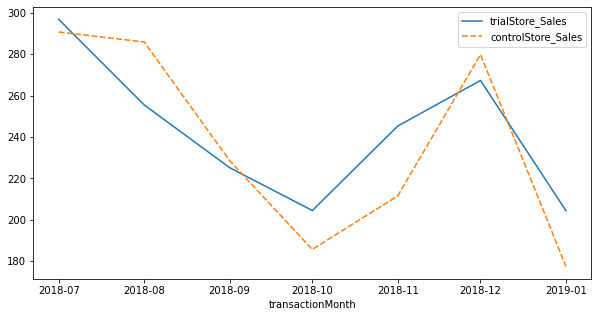

In [241]:
plt.figure(figsize=(10,5))
sb.lineplot(data=compare77)

In [242]:
# function for monthly number of customers
def compareCustomers(trialStore, controlStore):
    
    trialStore_df = pretrial.loc[pretrial['STORE_NBR'] == trialStore]
    trialStore_df.drop(trialStore_df.columns[[0, 1, 2, 4, 5, 6, 7]], axis=1, inplace=True)
    trialStore_df.rename(columns={'nCustomers': 'trialStore_Customers'}, inplace=True)

    controlStore_df = pretrial.loc[pretrial['STORE_NBR'] == controlStore]
    controlStore_df.drop(controlStore_df.columns[[0, 1, 2, 4, 5, 6, 7]], axis=1, inplace=True)
    controlStore_df.rename(columns={'nCustomers': 'controlStore_Customers'}, inplace=True)

    output = trialStore_df.set_index('transactionMonth').join(controlStore_df.set_index('transactionMonth'))
    return output

In [243]:
compareCustomers(77, 233)

C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,trialStore_Customers,controlStore_Customers
transactionMonth,,
2018-07-01,51,51
2018-08-01,47,48
2018-09-01,42,42
2018-10-01,37,35
2018-11-01,41,40
2018-12-01,46,47
2019-01-01,35,35


C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:xlabel='transactionMonth'>

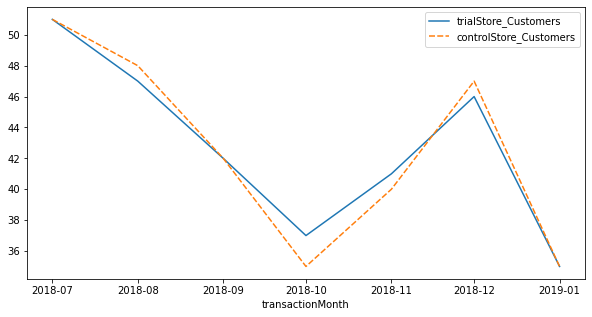

In [244]:
plt.figure(figsize=(10,5))
sb.lineplot(data=compareCustomers(77, 233))

## Assessment of trial 77

In [264]:
from scipy.stats import t
from scipy.stats import ttest_ind
from statistics import stdev

In [248]:
# scale all control stores' performance to trial store.
# ratio = trialsales / control sales
def salesratio(trialstore, controlstore):
    salesratio = pretrial[pretrial['STORE_NBR'] == trialstore]['totalSales'].sum() / pretrial[pretrial['STORE_NBR'] == controlstore]['totalSales'].sum()
    return salesratio

In [261]:
# create a dataframe with scaled control sales, trial sales and percentage difference
def scaledsales(trialstore, controlstore):
    scaledcontrolsales = monthly_df.loc[monthly_df['STORE_NBR'] == controlstore]
    scaledcontrolsales['scaledControlSales'] = scaledcontrolsales['totalSales'] * salesratio(trialstore, controlstore)
    scaledcontrolsales.drop(scaledcontrolsales.columns[[0,2,3,4,5,6,7,8]], axis=1, inplace=True)

    trialsales = monthly_df.loc[monthly_df['STORE_NBR'] == trialstore]
    trialsales.drop(trialsales.columns[[0,3,4,5,6,8]], axis=1, inplace=True)
    trialsales.rename(columns={'totalSales': 'trialSales'}, inplace=True)

    output = scaledcontrolsales.set_index('YEARMONTH').join(trialsales.set_index('YEARMONTH'))
    output['percentageDiff'] = abs(output.scaledControlSales - output.trialSales) / output.scaledControlSales
    return output

In [262]:
scaledsales(77, 233)

<ipython-input-261-953e3a2abc30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolsales['scaledControlSales'] = scaledcontrolsales['totalSales'] * salesratio(trialstore, controlstore)
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,scaledControlSales,trialSales,trialPeriod,percentageDiff
YEARMONTH,,,,
201807,297.565550,296.8,pre-trial,0.002573
201808,292.652187,255.5,pre-trial,0.126950
201809,233.998916,225.2,pre-trial,0.037602
201810,190.085733,204.5,pre-trial,0.075830
201811,216.597421,245.3,pre-trial,0.132516
201812,286.408121,267.3,pre-trial,0.066716
201901,181.692071,204.4,pre-trial,0.124980
201902,249.762622,235.0,trial,0.059107
201903,203.802205,278.5,trial,0.366521


In [271]:
def tvalue(trialstore, controlstore):
    output = scaledsales(trialstore,controlstore).loc[scaledsales(trialstore,controlstore)['trialPeriod'] == 'trial']
    std = (scaledsales(trialstore,controlstore).loc[scaledsales(trialstore,controlstore)['trialPeriod'] == 'pre-trial', 'percentageDiff']).std()
    mean = (scaledsales(trialstore,controlstore).loc[scaledsales(trialstore,controlstore)['trialPeriod'] == 'pre-trial', 'percentageDiff']).mean()
    output['t-value'] = (output['percentageDiff'] - mean) / std
    return output

In [272]:
tvalue(77,233)

<ipython-input-261-953e3a2abc30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolsales['scaledControlSales'] = scaledcontrolsales['totalSales'] * salesratio(trialstore, controlstore)
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\86189\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,scaledControlSales,trialSales,trialPeriod,percentageDiff,t-value
YEARMONTH,,,,,
201902,249.762622,235.0,trial,0.059107,-0.438867
201903,203.802205,278.5,trial,0.366521,5.716714
201904,162.345704,263.5,trial,0.623080,10.853971


In [273]:
# calculate critical value for 95% confidence interval
t.ppf(0.95, df=7)

1.894578605061305

Let null hypothesis be there is no difference between control store and trial store in trial period.

The increase in sales in the trial store 77 in March and April is statistically greater than in the control store 233.